In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")
from pymatreader import read_mat
import IPython
from pathlib import Path
from utilities import savefig
from scipy.signal import find_peaks

In [2]:
NB_NAME = Path(IPython.extract_module_locals()[1]["__vsc_ipynb_file__"]).stem

In [3]:
DATAPATH = os.path.join(os.path.abspath(""), "data", NB_NAME)

fnames = os.listdir(DATAPATH)
fnames = [os.path.join(DATAPATH, fname) for fname in fnames]

delays = []
corrs = []
freqs = []
for fname in fnames:
    data = read_mat(fname)["Data"]
    delay, corr, freq = data["timeDelay"] * 1e-6, data["corr"][-1], data["FG_Freq"]
    corr = corr / np.max(corr)
    delays.append(delay)
    corrs.append(corr)
    freqs.append(freq)

freqs = np.array(freqs)
sort_idc = np.argsort(freqs)
freqs = freqs[sort_idc]
delays = np.array(delays)[sort_idc]
corrs = np.array(corrs)[sort_idc]

/home/ali/miniconda3/envs/university/lib/python3.11/site-packages/pymatreader/utils.py:168: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn(


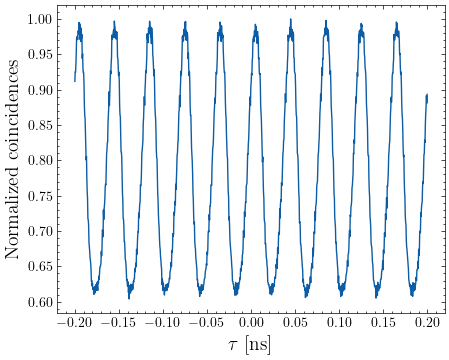

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(delays[-1], corrs[-1])
ax.set_xlabel(rf"$\tau$ [ns]", fontsize=14)
ax.set_ylabel(rf"Normalized coincidences", fontsize=14)
# savefig(NB_NAME, "modulation_25Mhz", fig)
plt.show()

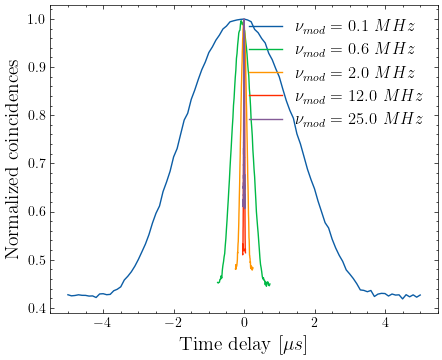

In [24]:
min_intervals = [2.5, 0.5, 0.1, 0.08, 0.02]
max_intervals = [12.5, 2, 0.6, 0.16, 0.07]
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
for idx, val in enumerate([0, 5, 10, 15, 22]):
    mask = (delays[val] >= min_intervals[idx]) & (delays[val] <= max_intervals[idx])
    delays_shifted = delays[val][mask] - np.mean([min_intervals[idx], max_intervals[idx]])
    ax.plot(delays_shifted, corrs[val][mask], label=fr"$\nu_{{mod}}=$ {freqs[val]} $MHz$")
    ax.set_xlabel(r"Time delay [$\mu s$]", fontsize=14)
    ax.set_ylabel(r"Normalized coincidences", fontsize=14)
    ax.legend(fontsize=12, frameon=False)

In [25]:
visibilities = []
for i in range(len(corrs)):
    Imin = np.min(corrs[i])
    Imax = np.max(corrs[i])
    visibilities.append((Imax - Imin) / (Imin + Imax))

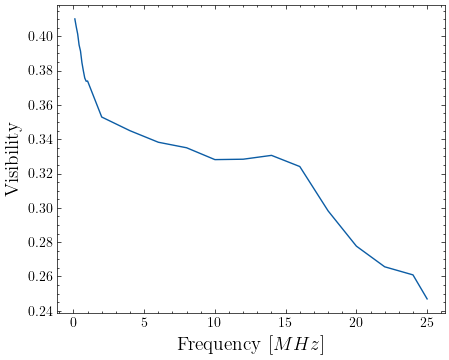

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(freqs, visibilities)
ax.set_xlabel(r"Frequency [$MHz$]", fontsize=14)
ax.set_ylabel(r"Visibility", fontsize=14)
# savefig(NB_NAME, "vis_freq", fig)